In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Machine Learning Note\train (1).csv" , usecols=['Age' , 'Fare' , 'Survived'])
df.sample(2)

,Survived,Age,Fare
759,1,33.0,86.5000
359,1,NaN,7.8792


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\alisa\AppData\Local\Temp\ipykernel_10804\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X_train , X_test , y_train , y_test = train_test_split(df.iloc[:,1:3] , df.iloc[:,0] , test_size=.2 , random_state=42)

In [10]:
y_train.head(2)

331    0
733    0
Name: Survived, dtype: int64

C:\Users\alisa\AppData\Local\Temp\ipykernel_10804\2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


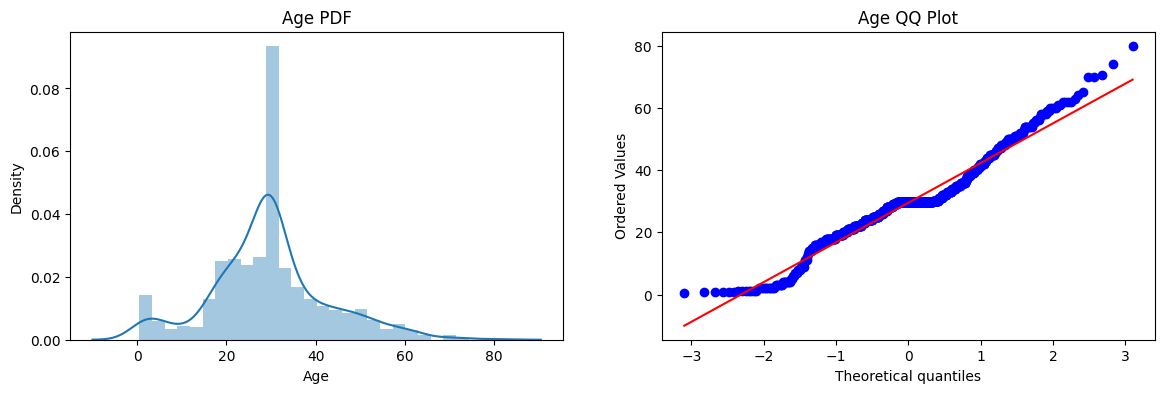

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121) # with 1st row and 2nd columns , 1st index
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\alisa\AppData\Local\Temp\ipykernel_10804\2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


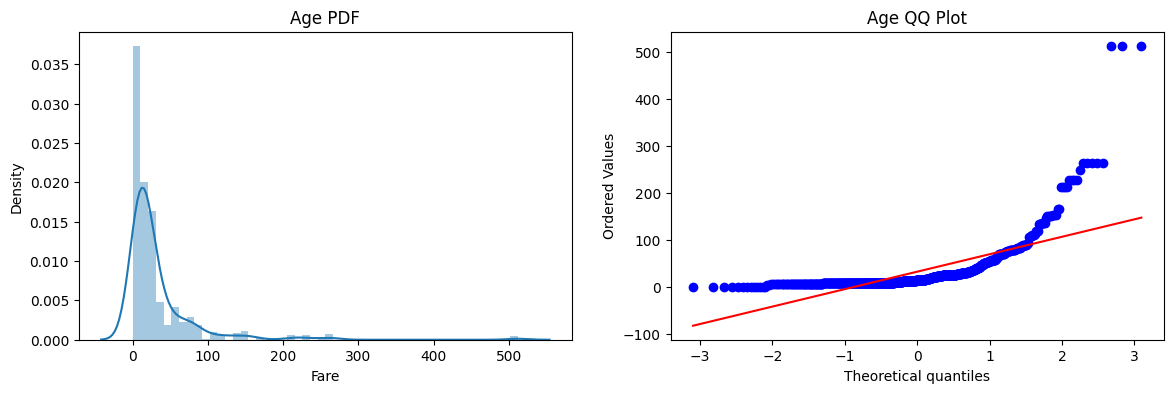

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [22]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [23]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)

In [26]:
print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


**With Transformer**

In [27]:
trf = FunctionTransformer(func=np.log1p) # log1p = log + 1

In [28]:
X_train_Tranformed = trf.fit_transform(X_train)
X_test_Tranformed = trf.fit_transform(X_test)

In [29]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_Tranformed , y_train)
clf2.fit(X_train_Tranformed , y_train)

DecisionTreeClassifier()

In [31]:
y_pred_clf1 = clf1.predict(X_test_Tranformed)
y_pred_clf2 = clf2.predict(X_test_Tranformed)

In [32]:
print("Acc LR" , accuracy_score(y_test,y_pred_clf1))
print("Acc DT" , accuracy_score(y_test,y_pred_clf2))

Acc LR 0.6815642458100558
Acc DT 0.6815642458100558


****cross validation****

In [36]:
X_transformed = trf.fit_transform(df.iloc[:,1:])

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,df.iloc[:,0],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,df.iloc[:,0],scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588639200998753


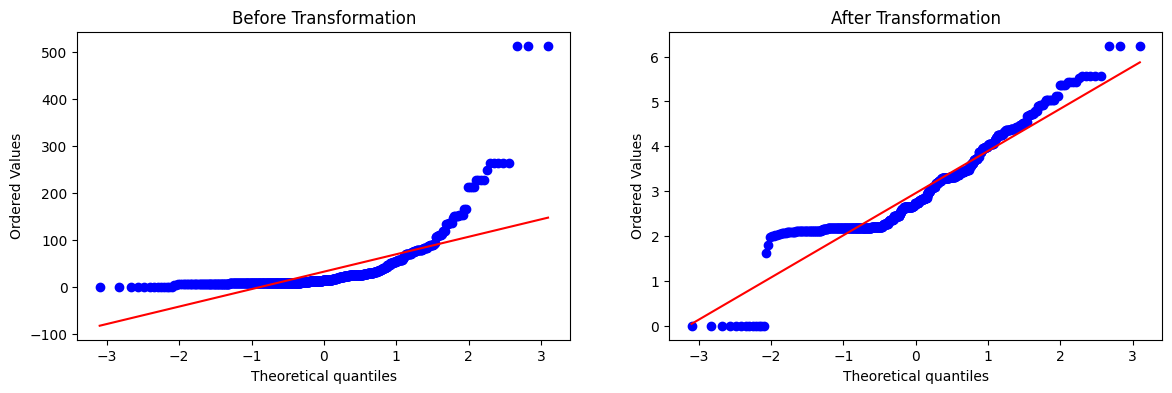

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'] , dist='norm' , plot=plt)
plt.title("Before Transformation")

plt.subplot(122)
stats.probplot(X_train_Tranformed['Fare'] , dist='norm' , plot=plt)
plt.title("After Transformation")

plt.show()

Sahi kaam kia hai

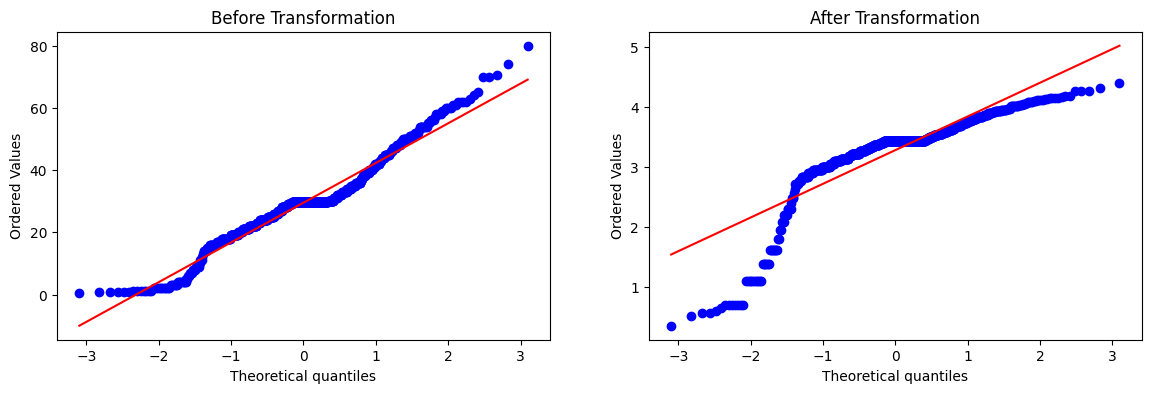

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'] , dist='norm' , plot=plt)
plt.title("Before Transformation")

plt.subplot(122)
stats.probplot(X_train_Tranformed['Age'] , dist='norm' , plot=plt)
plt.title("After Transformation")

plt.show()

pehle se hi normal tha, after transformation it's looks bad

In [41]:
trf2 = ColumnTransformer([
    ("Tansformation on Fare" ,FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [42]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6927374301675978


In [46]:
X_transformed2 = trf2.fit_transform(df.iloc[:,1:])

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,df.iloc[:,0],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,df.iloc[:,0],scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6622097378277153


nothing better happens

In [47]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.616167290886392


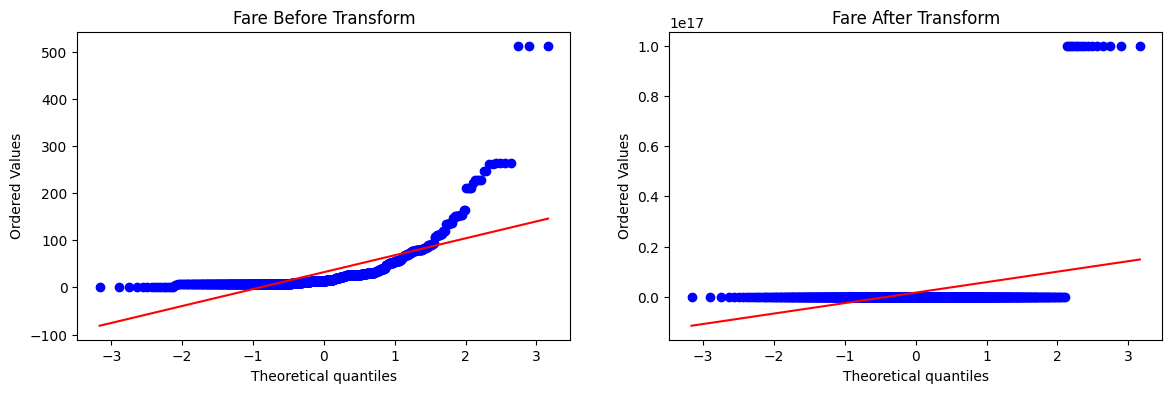

In [ ]:
apply_transform(lambda x:1/(x+.00000000000000001)) #Reciprocal

Accuracy 0.6431335830212235


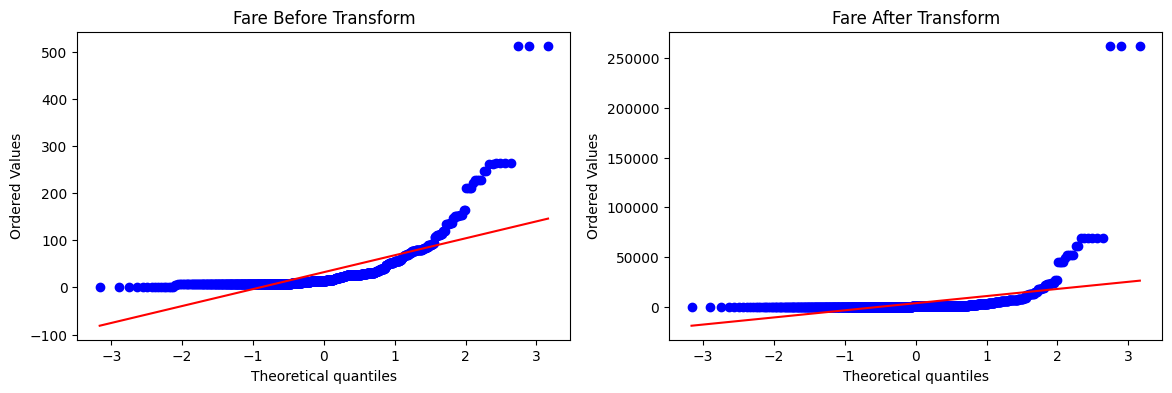

In [ ]:
apply_transform(lambda x :x**2) # square

Accuracy 0.6195131086142323


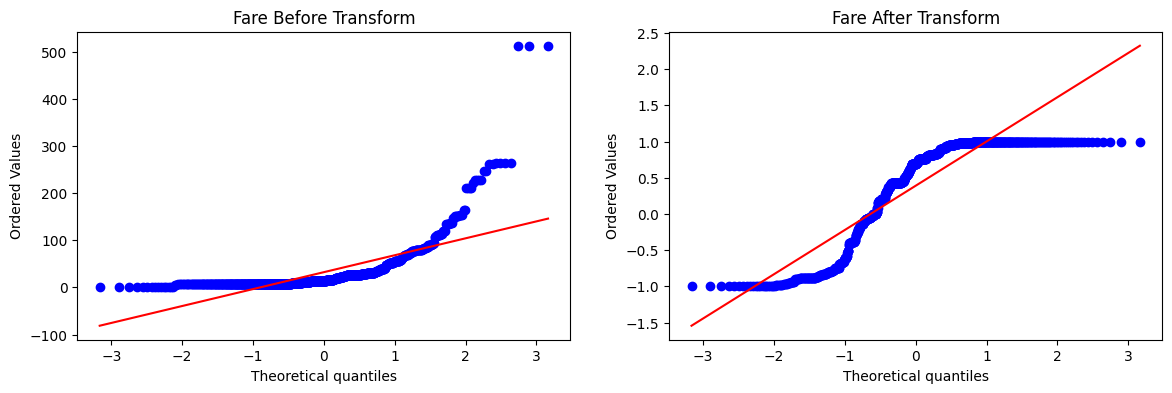

In [53]:
apply_transform(np.sin)